In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [114]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# Path Utama Anda (sudah terverifikasi benar)
import os
imagePaths = '/content/drive/MyDrive/Data/DatasetDaun'

# --- KOREKSI LABEL_LIST DI SINI ---
# Tambahkan 'Daun Nangka' karena ada di folder Anda
label_list = ['Nangka', 'Daun Sirih', 'Daun Nangka']
# ----------------------------------

data = []
labels = []
TARGET_SIZE = (32, 32)
total_images_processed = 0

print("Memulai pemrosesan data dengan label baru...")

for label in label_list:
    search_pattern = os.path.join(imagePaths, label, '*.jpg')
    image_file_list = glob.glob(search_pattern)

    if not image_file_list:
        print(f"-> ❌ GAGAL: Tidak ada file .jpg ditemukan untuk kelas '{label}'.")
        continue

    print(f"-> ✅ Ditemukan {len(image_file_list)} gambar untuk kelas '{label}'.")

    for imagePath in image_file_list:
        image = cv2.imread(imagePath)

        if image is None:
            continue

        image = cv2.resize(image, TARGET_SIZE)
        data.append(image)
        labels.append(label)
        total_images_processed += 1

# --- Ringkasan Akhir ---
data_array = np.array(data)
labels_array = np.array(labels)

print("\n--- Ringkasan Pemrosesan ---")
print(f"Total gambar yang berhasil diproses: {total_images_processed}")
print(f"Shape array data: {data_array.shape}")
print(f"Kelas yang diproses: {label_list}")

Memulai pemrosesan data dengan label baru...
-> ✅ Ditemukan 51 gambar untuk kelas 'Nangka'.
-> ✅ Ditemukan 51 gambar untuk kelas 'Daun Sirih'.
-> ✅ Ditemukan 52 gambar untuk kelas 'Daun Nangka'.

--- Ringkasan Pemrosesan ---
Total gambar yang berhasil diproses: 154
Shape array data: (154, 32, 32, 3)
Kelas yang diproses: ['Nangka', 'Daun Sirih', 'Daun Nangka']


In [116]:
np.array(data).shape

(154, 32, 32, 3)

In [117]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [118]:
print(labels)

['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun 

In [119]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels) # Reassign the encoded labels back to the labels variable
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [120]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [121]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (123, 32, 32, 3)
Ukuran data test = (31, 32, 32, 3)


In [122]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_list), activation='softmax')) # Change to len(label_list) units and softmax activation

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [123]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,647,317 (6.28 MB)

 Trainable params: 1,647,317 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

### Algoritma Alternatif: Support Vector Machine (SVM)

Selain menggunakan Convolutional Neural Network (CNN) untuk klasifikasi gambar, kita juga bisa menggunakan algoritma machine learning klasik seperti Support Vector Machine (SVM). SVM bekerja dengan mencari hyperplane terbaik yang memisahkan kelas-kelas data dalam ruang berdimensi tinggi.

Untuk menggunakan SVM dengan data gambar, kita perlu meratakan (flatten) data gambar menjadi vektor fitur.

In [124]:
from sklearn.svm import SVC

# Meratakan data gambar
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print('Ukuran data train (flattened) =', x_train_flat.shape)
print('Ukuran data test (flattened) =', x_test_flat.shape)

Ukuran data train (flattened) = (123, 3072)
Ukuran data test (flattened) = (31, 3072)


Sekarang kita akan melatih model SVM menggunakan data yang telah diratakan.

In [125]:
# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear') # Anda bisa mencoba kernel lain seperti 'rbf'
svm_model.fit(x_train_flat, y_train)

SVC(kernel='linear')

Setelah model SVM dilatih, kita dapat menggunakannya untuk membuat prediksi pada data uji dan mengevaluasi kinerjanya.

In [126]:
# Melakukan prediksi dengan model SVM
svm_predictions = svm_model.predict(x_test_flat)

# Menampilkan laporan klasifikasi untuk model SVM
print("Laporan Klasifikasi untuk Model SVM:")
print(classification_report(y_test, svm_predictions, target_names=label_list))

Laporan Klasifikasi untuk Model SVM:
              precision    recall  f1-score   support

      Nangka       0.54      0.70      0.61        10
  Daun Sirih       1.00      0.90      0.95        10
 Daun Nangka       0.67      0.55      0.60        11

    accuracy                           0.71        31
   macro avg       0.74      0.72      0.72        31
weighted avg       0.73      0.71      0.71        31



In [127]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [128]:
# compile arsitektur yang telah dibuat
model.compile(loss='categorical_crossentropy', # Change loss function to categorical_crossentropy
              optimizer=opt_funct,
              metrics=['accuracy'])

In [129]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming 'labels' has been transformed by LabelEncoder in a previous cell
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=len(label_list))
y_test = to_categorical(y_test, num_classes=len(label_list))

print('Ukuran label train (one-hot encoded) =', y_train.shape)
print('Ukuran label test (one-hot encoded) =', y_test.shape)

Ukuran label train (one-hot encoded) = (123, 3)
Ukuran label test (one-hot encoded) = (31, 3)


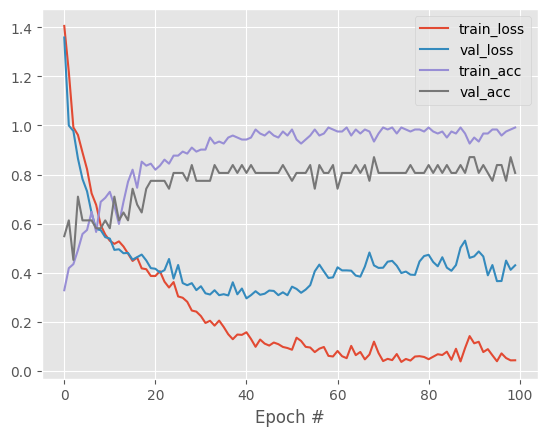

In [130]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Daun Nangka Test:


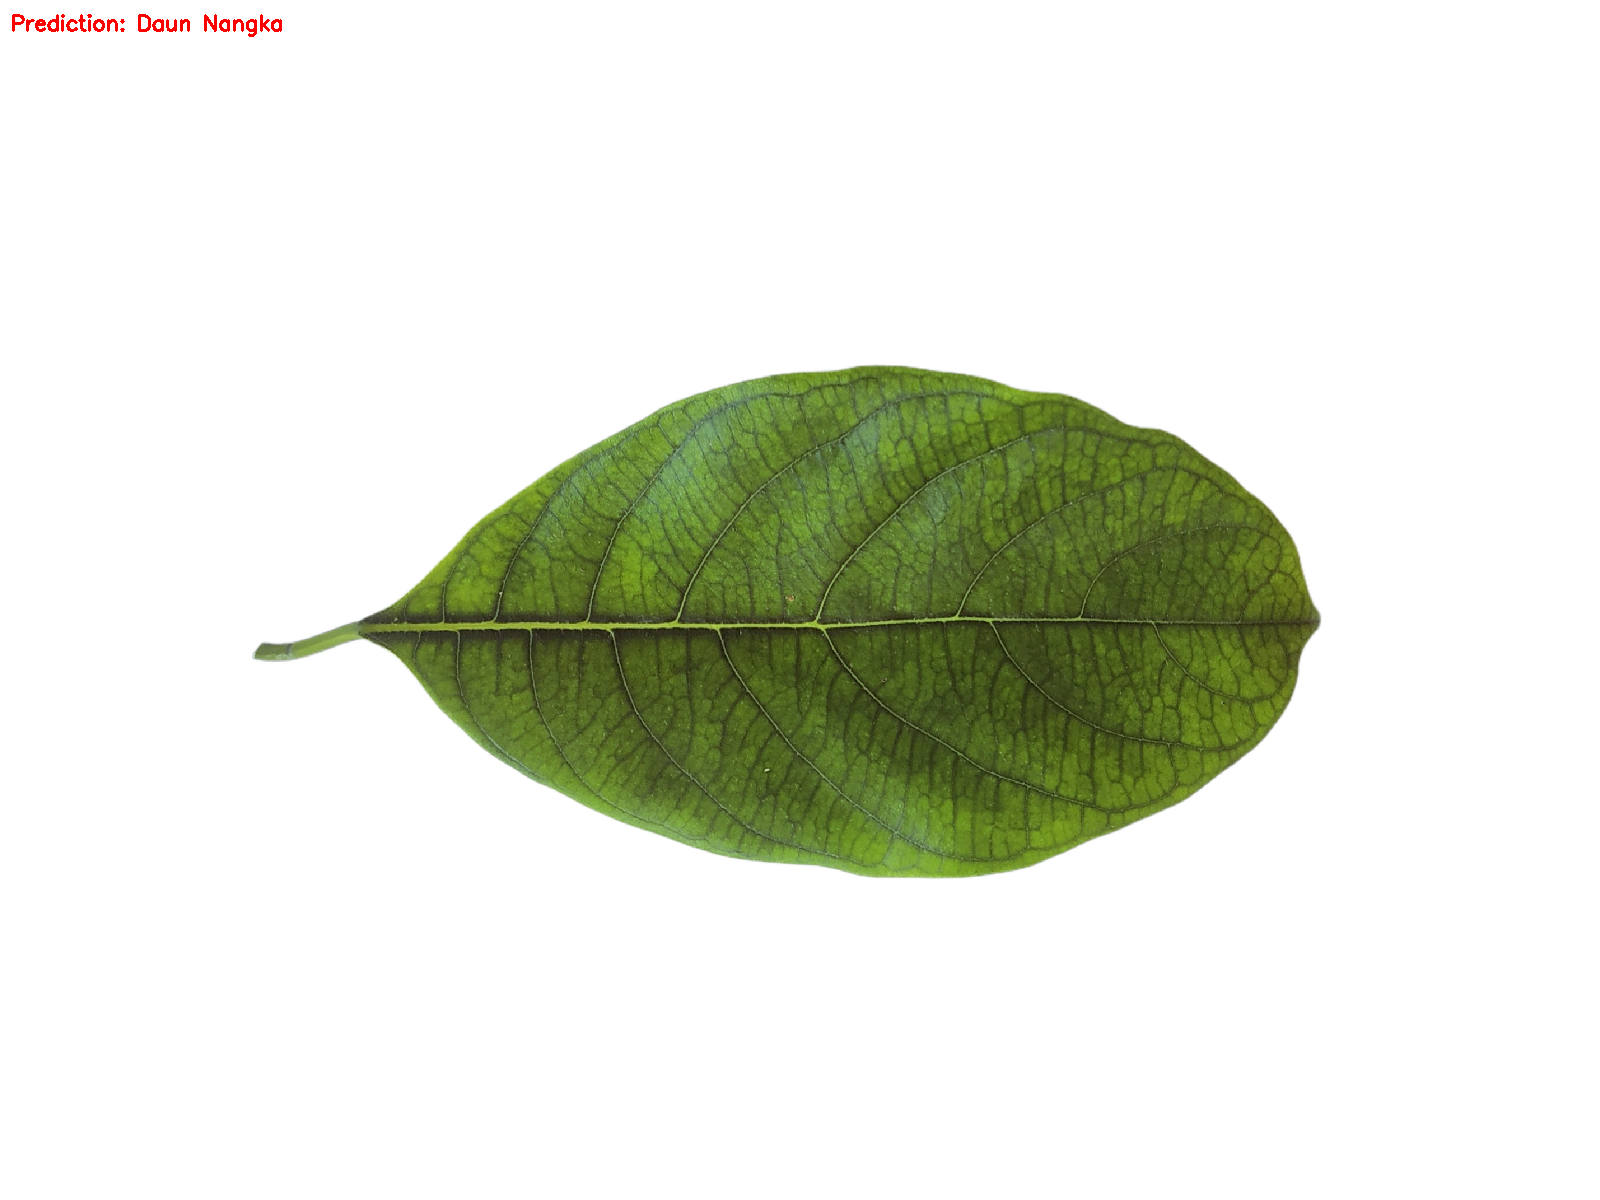

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Daun Sirih Test:


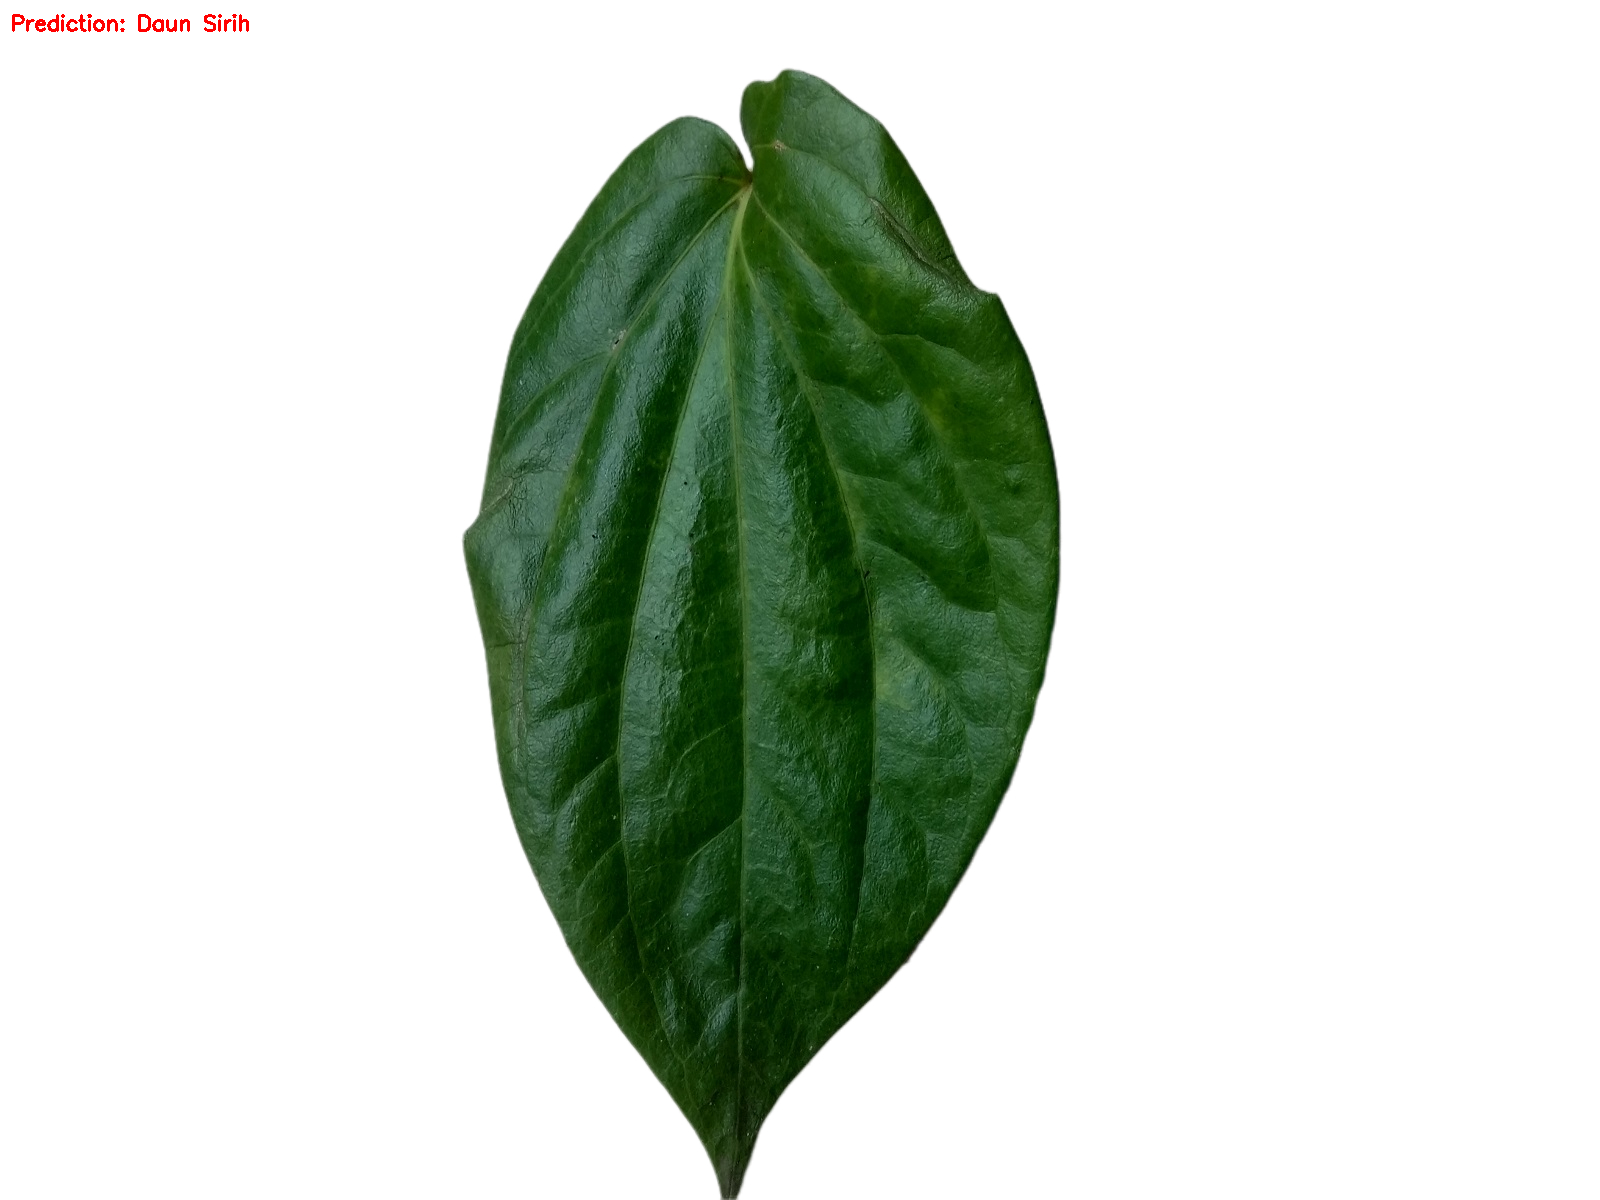

In [131]:
from google.colab.patches import cv2_imshow

# Test with a "Daun Nangka" image
queryPath_nangka = imagePaths+'/Daun Nangka/001.jpg'
query_nangka = cv2.imread(queryPath_nangka)

if query_nangka is None:
    print(f"Error: Image not found at {queryPath_nangka}")
else:
    output_nangka = query_nangka.copy()
    query_nangka_resized = cv2.resize(query_nangka, (32, 32))
    q_nangka = []
    q_nangka.append(query_nangka_resized)
    q_nangka = np.array(q_nangka, dtype='float') / 255.0

    q_pred_nangka = model.predict(q_nangka)

    # Find the index of the class with the highest probability
    predicted_class_index_nangka = np.argmax(q_pred_nangka)
    # Get the class name using the index
    target_nangka = label_list[predicted_class_index_nangka]

    text_nangka = "Prediction: {}".format(target_nangka)
    cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Display the image
    print("Daun Nangka Test:")
    cv2_imshow(output_nangka)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/019.jpg'
query_sirih = cv2.imread(queryPath_sirih)

if query_sirih is None:
    print(f"Error: Image not found at {queryPath_sirih}")
else:
    output_sirih = query_sirih.copy()
    query_sirih_resized = cv2.resize(query_sirih, (32, 32))
    q_sirih = []
    q_sirih.append(query_sirih_resized)
    q_sirih = np.array(q_sirih, dtype='float') / 255.0

    q_pred_sirih = model.predict(q_sirih)

    # Find the index of the class with the highest probability
    predicted_class_index_sirih = np.argmax(q_pred_sirih)
    # Get the class name using the index
    target_sirih = label_list[predicted_class_index_sirih]

    text_sirih = "Prediction: {}".format(target_sirih)
    cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Display the image
    print("\nDaun Sirih Test:")
    cv2_imshow(output_sirih)